# Спектор сигналов. Преобразование Фурье. Прямое. Обратное.
*Кулебакин Е.Д. ИА-031 - 2022, e-mail: geka_kule@mail.ru, github.com: https://github.com/Jencik4*

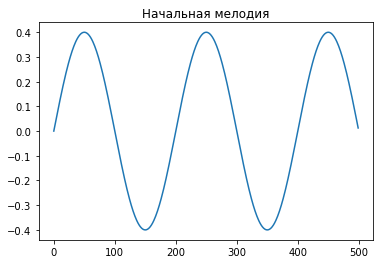

In [1]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt


duration = 0.3
fs = 44000
amplitude = 0.4  

timeSamples = np.arange(np.ceil(duration * fs)) / fs

A = amplitude * np.sin(2 * np.pi * 220 * timeSamples)
C = amplitude * np.sin(2 * np.pi * 261.63 * timeSamples)
D = amplitude * np.sin(2 * np.pi * 293.66 * timeSamples)
E = amplitude * np.sin(2 * np.pi * 329.63 * timeSamples)
F = amplitude * np.sin(2 * np.pi * 349.23 * timeSamples)
G = amplitude * np.sin(2 * np.pi * 392.00 * timeSamples)
A1 = amplitude * np.sin(2 * np.pi * 440 * timeSamples)
A_ = amplitude * np.sin(2 * np.pi * 466.16 * timeSamples)

part1 = np.concatenate((A,C,D,D,D,E,F,F))
part2 = np.concatenate((F,G,E,E,D,C,C,D))
part3 = np.concatenate((F,G,E,E,D,C,D))
part4 = np.concatenate((A,C,D,D,D,F,G,G))
part5 = np.concatenate((G,A1,A_,A_,A1,G,A1))
part6 = np.concatenate((D,D,E,F,F,G,A1,D))
part7 = np.concatenate((D,F,E,E,F,D,E))
fullMelody = np.concatenate((part1,part2,part1,part3,part4,part5,part6,part7))

#sd.play(fullMelody, fs, None,1)
plt.title('Начальная мелодия')
plt.plot(fullMelody[:500])
plt.show()


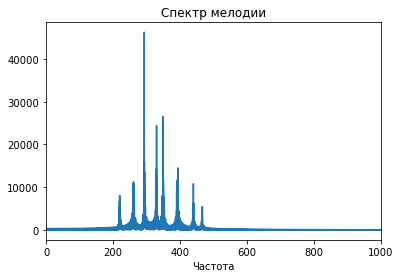

In [2]:
spector = np.fft.rfft(fullMelody)


N = int(duration * fs * 61)
x_axis = np.fft.rfftfreq(N, 1/fs)

plt.title('Спектр мелодии')
plt.plot(x_axis, np.abs(spector))
plt.xlabel('Частота')
plt.xlim([0, 1000])
plt.show()

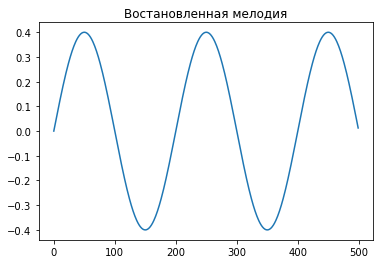

In [3]:
restoredMelody = np.fft.irfft(spector)
#sd.play(restoredMelody, fs, None,1)

plt.title('Востановленная мелодия')
plt.plot(restoredMelody[:500])
plt.show()



In [4]:
fs=100000

recDuration = 3  # seconds
myrecording = sd.rec(recDuration * fs, samplerate=fs, channels=1,dtype='float64')
print ("Recording Audio")
sd.wait()
print ("Audio recording complete , Play Audio")
sd.play(myrecording, fs)
sd.wait()
print ("Play Audio Complete")

Recording Audio
Audio recording complete , Play Audio
Play Audio Complete


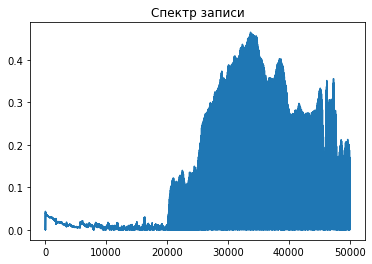

In [5]:
fs=100000
voiceFFT = np.fft.rfft(myrecording)
N = int(2 * recDuration * fs) 
x_axis = np.fft.rfftfreq(N-1, 1/fs)

plt.title('Спектр записи')
plt.plot(x_axis, np.abs(voiceFFT))
plt.show()
